<a href="https://colab.research.google.com/github/dipti-kesarkar/Customers-Reviews-Sentiment-Analysis/blob/main/Customer_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None


In [ ]:
print(df.describe())

         Unnamed: 0   Clothing ID           Age        Rating  \
count  23486.000000  23486.000000  23486.000000  23486.000000   
mean   11742.500000    918.118709     43.198544      4.196032   
std     6779.968547    203.298980     12.279544      1.110031   
min        0.000000      0.000000     18.000000      1.000000   
25%     5871.250000    861.000000     34.000000      4.000000   
50%    11742.500000    936.000000     41.000000      5.000000   
75%    17613.750000   1078.000000     52.000000      5.000000   
max    23485.000000   1205.000000     99.000000      5.000000   

       Recommended IND  Positive Feedback Count  
count     23486.000000             23486.000000  
mean          0.822362                 2.535936  
std           0.382216                 5.702202  
min           0.000000                 0.000000  
25%           1.000000                 0.000000  
50%           1.000000                 1.000000  
75%           1.000000                 3.000000  
max           

In [ ]:
print(df.head())

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

2.Check Missing Values

In [ ]:
missing = df.isnull().sum()
print(missing)

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


In [ ]:
# Check missing values
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage})
print("\nMissing Values in Ecah Column:")
print(missing_df)


Missing Values in Ecah Column:
                         Missing Values  Percentage
Unnamed: 0                            0    0.000000
Clothing ID                           0    0.000000
Age                                   0    0.000000
Title                              3810   16.222430
Review Text                         845    3.597888
Rating                                0    0.000000
Recommended IND                       0    0.000000
Positive Feedback Count               0    0.000000
Division Name                        14    0.059610
Department Name                      14    0.059610
Class Name                           14    0.059610


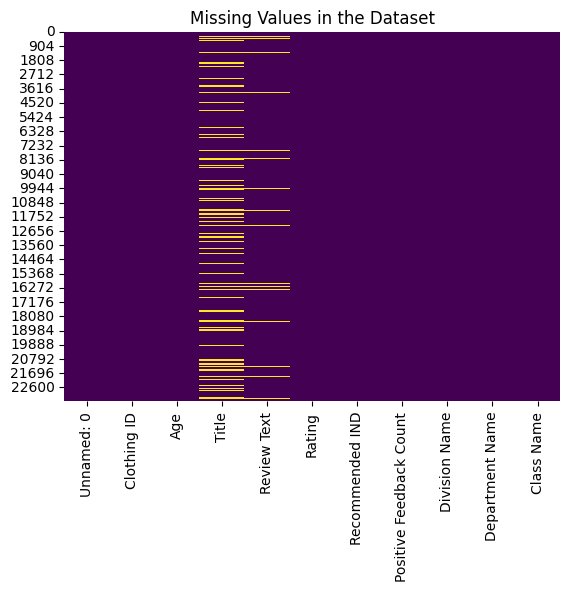

In [ ]:
# Visualize missing values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

3.Rating Analysis

In [ ]:
# Numerical summary
print("\nRatings Distribution (Counts):")
print(df['Rating'].value_counts())


Ratings Distribution (Counts):
Rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64


In [ ]:
print("\nRatings Distibution (Percentages):")
print((df['Rating'].value_counts(normalize=True) * 100))


Ratings Distibution (Percentages):
Rating
5    55.909904
4    21.617134
3    12.224304
2     6.663544
1     3.585115
Name: proportion, dtype: float64


<ipython-input-13-a44870c70a77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Rating',palette='viridis')


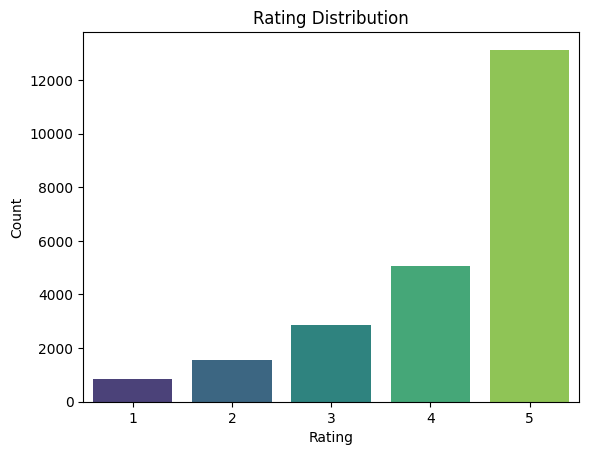

In [ ]:
# Plot distribution of ratings
sns.countplot(data=df,x='Rating',palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 0','Clothing ID'], axis = 1, inplace=True)

In [ ]:
df.columns

Index(['Age', 'Title', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [ ]:
df.shape

(23486, 9)

In [ ]:
df = df.rename(columns = {'Review Text' : 'text', 'recommended_ind' : 'recommended',
                          'positive_feedback_count' : 'feedback_count', 'division_name' : 'division',
                          'department_name' : 'department','class_name' : 'class'})

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,23486.0,43.198544,12.279544,18.0,34.0,41.0,52.0,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.0,5.0,5.0,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.0,1.0,3.0,122.0


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
Title,19676,13993,Love it!,136
text,22641,22634,Perfect fit and i've gotten so many compliment...,3
Division Name,23472,3,General,13850
Department Name,23472,6,Tops,10468
Class Name,23472,20,Dresses,6319


In [ ]:
df.head()

,Age,Title,text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


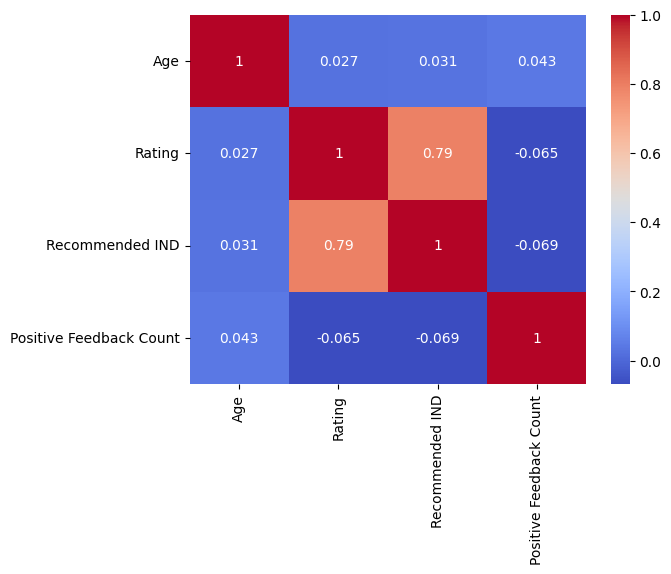

In [ ]:
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,cmap="coolwarm")
plt.show()

In [ ]:
df.columns

Index(['Age', 'Title', 'text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [ ]:
df.Age.describe().T

,Age
count,23486.000000
mean,43.198544
std,12.279544
min,18.000000
25%,34.000000
50%,41.000000
75%,52.000000
max,99.000000


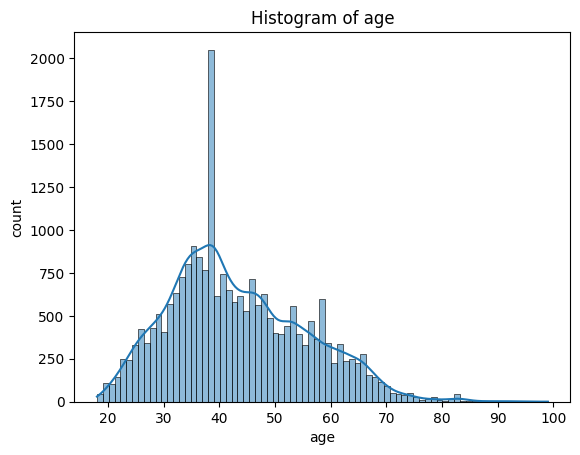

In [ ]:
sns.histplot(df['Age'], bins = 77, kde=True)

plt.xlabel('age')
plt.ylabel('count')
plt.title('Histogram of age')
plt.show()

In [ ]:
# Add a column for review length
df['Review Length'] = df['text'].apply(lambda x: len(str(x)))

In [ ]:
# Numerical summary
print("\nSummary Statistics for Review Length:")
print(df['Review Length'].describe())


Summary Statistics for Review Length:
count    23486.000000
mean       297.689602
std        152.363034
min          3.000000
25%        173.000000
50%        292.000000
75%        451.000000
max        508.000000
Name: Review Length, dtype: float64


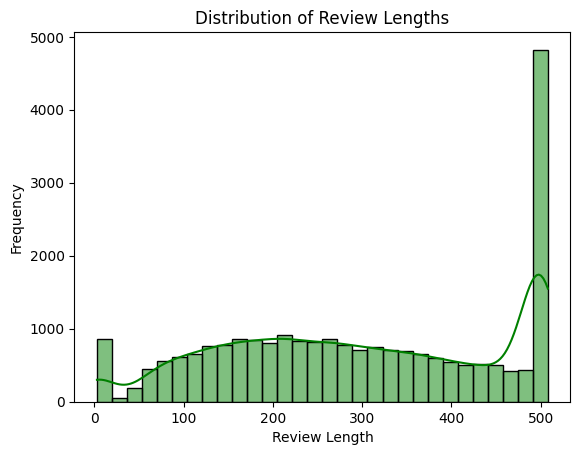

In [ ]:
# Distribution of review lengths
sns.histplot(df['Review Length'], bins=30, kde=True, color='green')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Relationship between review length and ratings
print("\nAverage Review Length by Rating:")
avg_review_length = df.groupby('Rating')['Review Length'].mean()
print(avg_review_length)


Average Review Length by Rating:
Rating
1    296.627078
2    315.383387
3    322.001742
4    311.784321
5    284.883634
Name: Review Length, dtype: float64


<ipython-input-32-ccb2b1991f62>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Rating', y='Review Length',palette='coolwarm')


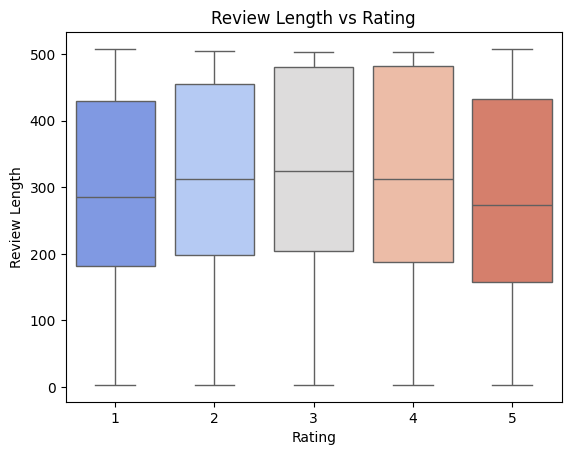

In [ ]:
sns.boxplot(data=df, x='Rating', y='Review Length',palette='coolwarm')
plt.title('Review Length vs Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

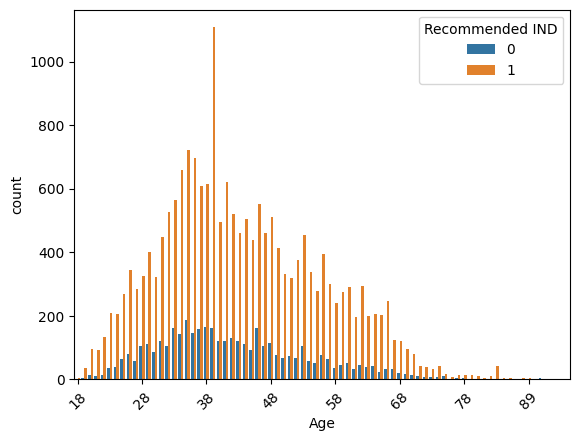

In [ ]:
# Create the countplot
sns.countplot(data=df, x="Age", hue="Recommended IND")

# Show every 5th label on the x-axis
plt.xticks(np.arange(0, len(df["Age"].unique()),step=10), rotation=45)

# Display the plot
plt.show()

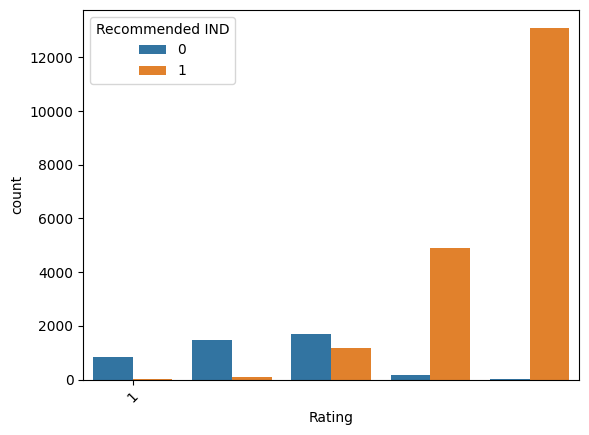

In [ ]:
# Create the countplot
sns.countplot(data=df, x="Rating", hue="Recommended IND")

# Show every 5th label on the x-axis
plt.xticks(np.arange(0, len(df["Rating"].unique()),step=5), rotation=45)

# Display the plot
plt.show()

In [ ]:
df.columns= df.columns.str.lower().str.replace('&','_').str.replace(' ','_')

In [ ]:
df = df.rename(columns = {'Review Text' : 'text', 'recommended_ind' : 'recommended',
                          'positive_feedback_count' : 'feedback_count', 'division_name' : 'division',
                          'department_name' : 'department','class_name' : 'class'})

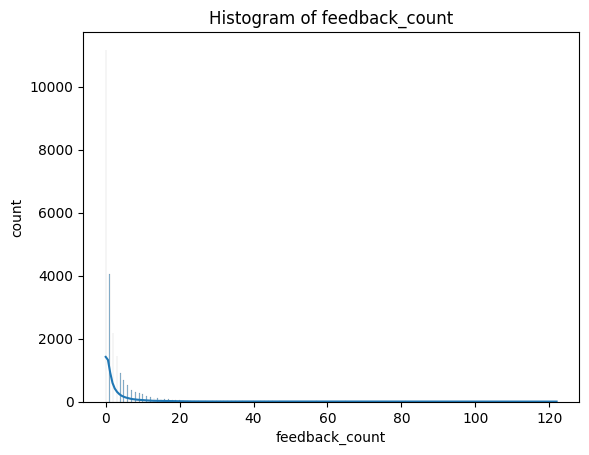

In [ ]:
sns.histplot(df['feedback_count'], kde=True)

plt.xlabel('feedback_count')
plt.ylabel('count')
plt.title('Histogram of feedback_count')
plt.show()

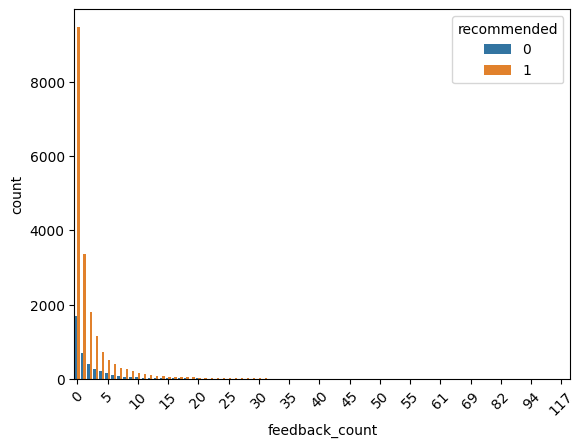

In [ ]:
# Create the countplot
sns.countplot(data=df, x="feedback_count", hue="recommended")

# Show every 5th label on the x-axis
plt.xticks(np.arange(0, len(df["feedback_count"].unique()),step=5), rotation=45)

# Display the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

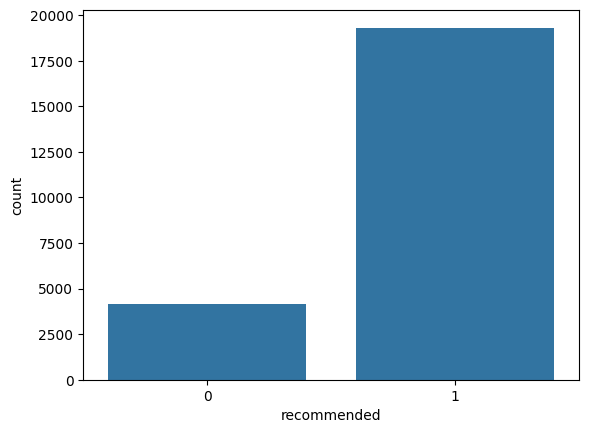

In [ ]:
sns.countplot(data=df, x="recommended")
plt.xlim(-0.5,1.5) # Adjust the range to bring bars closer
plt.show

In [ ]:
df.feedback_count.describe().T

,feedback_count
count,23486.000000
mean,2.535936
std,5.702202
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,122.000000


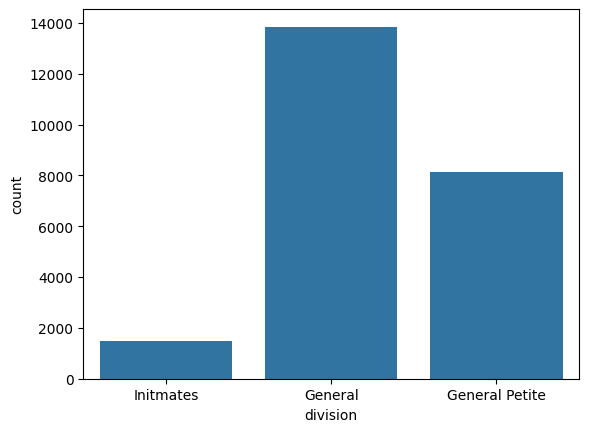

In [ ]:
sns.countplot(data=df, x="division")
plt.show()

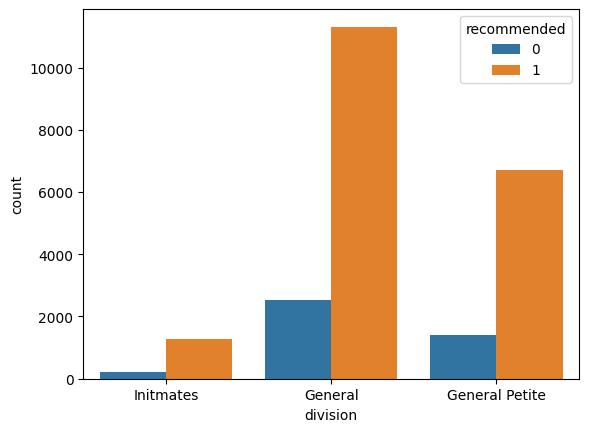

In [ ]:
# create the countplot
sns.countplot(data=df, x="division", hue="recommended")
# Display the plot
plt.show()

In [ ]:
df.department.describe().T

,department
count,23472
unique,6
top,Tops
freq,10468


In [ ]:
df_ml = df.copy()

In [ ]:
drop_columns = ['age',
                'title',
                'rating',
                'feedback_count',
                'division',
                'department',
                'class']

In [ ]:
df_ml.drop(drop_columns, axis = 1, inplace = True)

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           22641 non-null  object
 1   recommended    23486 non-null  int64 
 2   review_length  23486 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 550.6+ KB


In [ ]:
df_ml.rename(columns = {'review_text':'text','recommended':'recommended'}, inplace = True)

In [ ]:
df_ml.columns

Index(['text', 'recommended', 'review_length'], dtype='object')

In [ ]:
df_ml.isnull().sum()

,0
text,845
recommended,0
review_length,0


In [ ]:
df_ml.head()

,text,recommended,review_length
0,Absolutely wonderful - silky and sexy and comf...,1,53
1,Love this dress! it's sooo pretty. i happene...,1,303
2,I had such high hopes for this dress and reall...,0,500
3,"I love, love, love this jumpsuit. it's fun, fl...",1,124
4,This shirt is very flattering to all due to th...,1,192


In [ ]:
df_ml.drop('review_length', axis = 1, inplace = True)

In [ ]:
df_ml.head()

,text,recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [ ]:
df_ml = df_ml.dropna()

In [ ]:
df_ml.isnull().sum()

,0
text,0
recommended,0


In [ ]:
df_ml["text"].str.isspace().sum()
df_ml[df_ml["text"].str.isspace() == True].index

Index([], dtype='int64')

In [ ]:
df_ml.head()

,text,recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt') # Download punkt for word_tokenize
nltk.download('wordnet') # Download wordnet for WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize # import word_tokenize
from nltk.stem import WordNetLemmatizer # import WordLemmatizer
nltk.download('punkt_tab') # Download the punkt_tab resource

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
def cleaning(data):

  #1. Tokenize
  text_tokens = word_tokenize(data.replace("'","").lower())

  #2. Remove Puncs
  tokens_without_punc = [w for w in text_tokens if w.isalpha()]

  #3. Removing Stopwords
  tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

  #4. lemma
  text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

  #joining
  return " ".join(text_cleaned)

In [ ]:
df_ml["text"] = df_ml["text"].apply(cleaning)
df_ml["text"].head()

,text
0,absolutely wonderful silky sexy comfortable
1,love dress sooo pretty happened find store im ...
2,high hope dress really wanted work initially o...
3,love love love jumpsuit fun flirty fabulous ev...
4,shirt flattering due adjustable front tie perf...


In [ ]:
" ".join(df_ml["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

In [ ]:
rare_words = pd.Series(" ".join(df_ml["text"]).split()).value_counts()
rare_words

,count
dress,11352
fit,10128
size,9363
love,8992
top,8281
...,...
amsterdam,1
backpacker,1
necessa,1
creamish,1


In [ ]:
rare_words = rare_words[rare_words <= 2]

In [ ]:
rare_words.index

Index(['gravitating', 'zillion', 'recomme', 'corodorys', 'discoloration',
       'surrounding', 'patent', 'perfecto', 'excitedly', 'detach',
       ...
       'ebough', 'lthink', 'attrac', 'asthetically', 'clin', 'amsterdam',
       'backpacker', 'necessa', 'creamish', 'platinum'],
      dtype='object', length=6501)

In [ ]:
df_ml["text"] = df_ml["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df_ml["text"].head()

,text
0,absolutely wonderful silky sexy comfortable
1,love dress sooo pretty happened find store im ...
2,high hope dress really wanted work initially o...
3,love love love jumpsuit fun flirty fabulous ev...
4,shirt flattering due adjustable front tie perf...


In [ ]:
df_ml[df_ml["recommended"] == 0].head(3)

,text,recommended
2,high hope dress really wanted work initially o...,0
5,love tracy reese dress one petite foot tall us...,0
10,dress run small esp zipper area run ordered sp...,0


In [ ]:
df_ml[df_ml["recommended"] == 1].head(3)

,text,recommended
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
3,love love love jumpsuit fun flirty fabulous ev...,1


In [ ]:
" ".join(df_ml["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flatteri

In [ ]:
positive_words =" ".join(df_ml[df_ml["recommended"] == 1].text).split()
positive_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'petite',
 'decided',
 'though',
 'said',
 'everything',
 '

In [ ]:
negative_words =" ".join(df_ml[df_ml["recommended"] == 0].text).split()
negative_words

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically',
 'fit',
 'tight',
 'material',

In [ ]:
len(positive_words)

516811

In [ ]:
len(negative_words)

116487

In [ ]:
review_text = df_ml["text"]

In [ ]:
all_words = " ".join(review_text)

In [ ]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

In [ ]:
from wordcloud import WordCloud

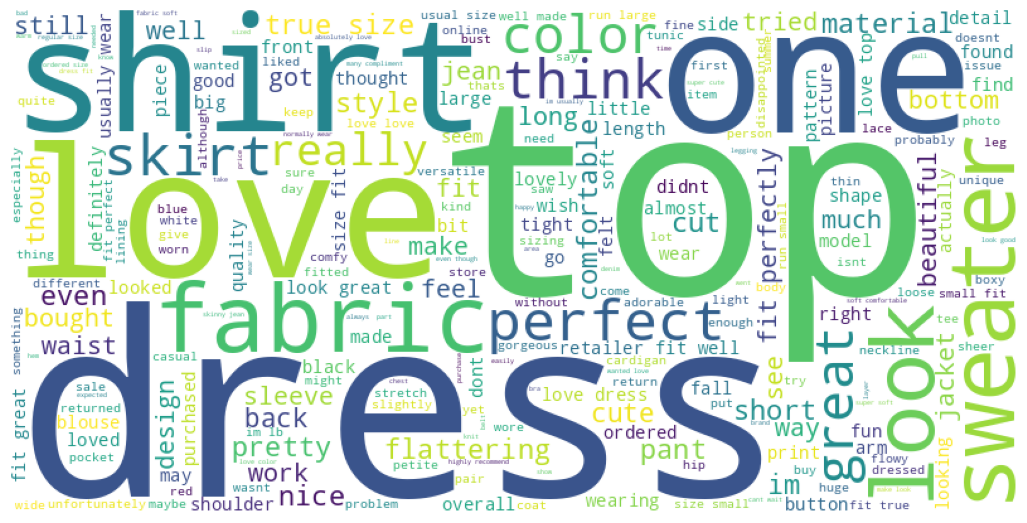

In [ ]:
wordcloud = WordCloud(width = 800,height = 400,background_color = "white",max_words = 250).generate(all_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

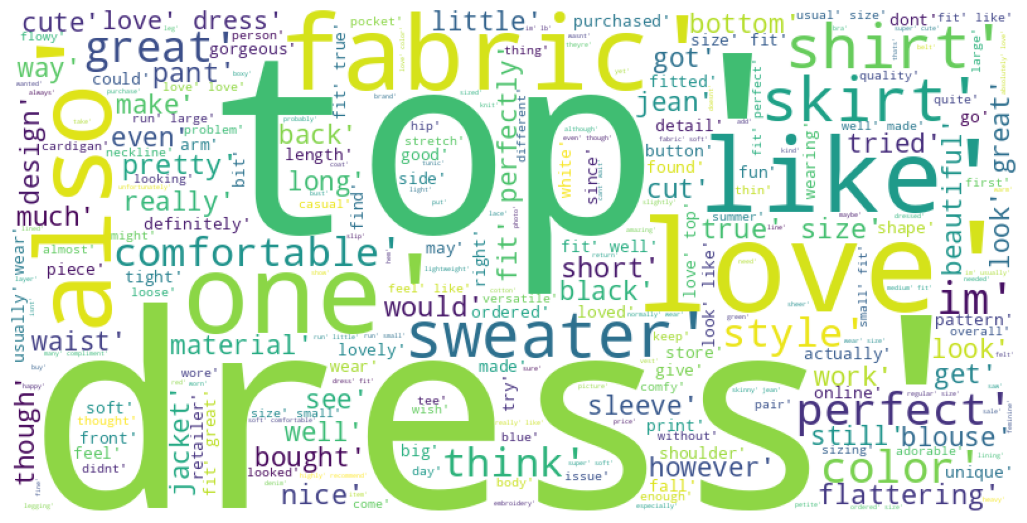

In [ ]:
wordcloud = WordCloud(width = 800,height = 400,background_color = "white",max_words = 250).generate(str(positive_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

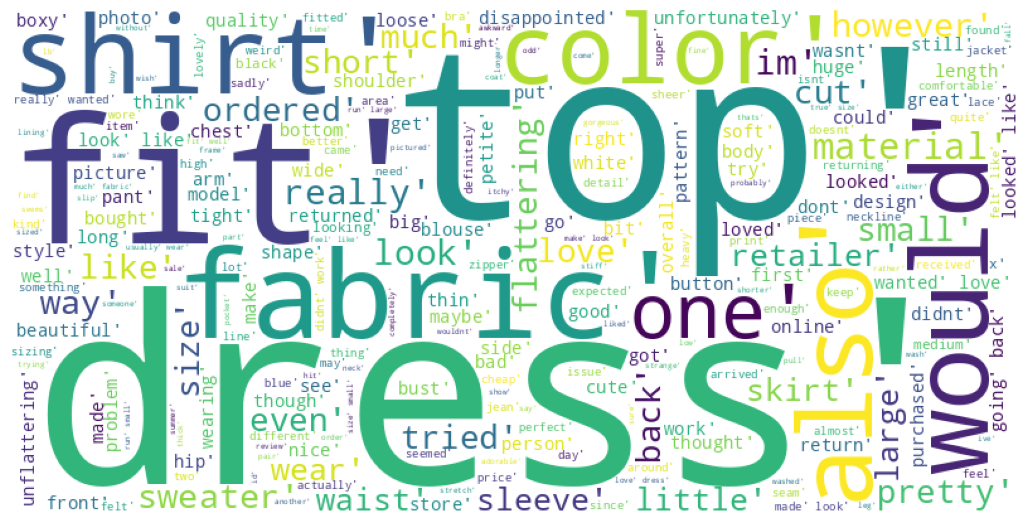

In [ ]:
wordcloud = WordCloud(width = 800,height = 400,background_color = "white",max_words = 250).generate(str(negative_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from collections import Counter # Import the Counter object
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
counter_all = Counter(word_tokenize(all_words))
counter_all.most_common(50)

[('dress', 11352),
 ('fit', 10128),
 ('size', 9363),
 ('love', 8992),
 ('top', 8281),
 ('like', 7036),
 ('color', 6916),
 ('look', 6891),
 ('wear', 6521),
 ('great', 6101),
 ('im', 5968),
 ('would', 5014),
 ('fabric', 4862),
 ('small', 4589),
 ('really', 3924),
 ('ordered', 3835),
 ('little', 3773),
 ('perfect', 3760),
 ('one', 3704),
 ('flattering', 3485),
 ('soft', 3322),
 ('well', 3251),
 ('back', 3186),
 ('comfortable', 3047),
 ('cute', 3030),
 ('nice', 3017),
 ('bought', 2986),
 ('beautiful', 2950),
 ('bit', 2877),
 ('material', 2811),
 ('shirt', 2791),
 ('large', 2791),
 ('much', 2703),
 ('sweater', 2700),
 ('length', 2638),
 ('run', 2631),
 ('jean', 2600),
 ('also', 2583),
 ('work', 2527),
 ('petite', 2430),
 ('got', 2426),
 ('long', 2400),
 ('short', 2361),
 ('waist', 2306),
 ('quality', 2259),
 ('medium', 2233),
 ('skirt', 2220),
 ('think', 2194),
 ('pretty', 2188),
 ('even', 2166)]

In [ ]:
X = df_ml["text"]
y = df_ml["recommended"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y,random_state = 101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count

<18112x5471 sparse matrix of type '<class 'numpy.int64'>'
	with 459519 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_count

<4529x5471 sparse matrix of type '<class 'numpy.int64'>'
	with 113971 stored elements in Compressed Sparse Row format>

In [ ]:
len(X_train_count.toarray())

18112

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
len(X_test_count.toarray())

4529

In [ ]:
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train

,text
1222,beautiful sweater soft lovely color easy wear ...
15835,surprised low review dress dress obviously loo...
6000,bought blue love usually wear x small retailer...
13404,dress run bit small large arm hole unflatterin...
9098,hourglass shape dress good fit think dress loo...
...,...
2856,ruffle sweet detail might otherwise basic rath...
15894,purchased blue white pattern shirt color blue ...
17118,sweater came expected adorable others said sof...
18345,top flattering im medium build bulky fabric di...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score,average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay # import ConfusionMatrixDisplay

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score,average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay # this imports the ConfusionMatrixDisplay

In [ ]:
def eval(model,X_train,X_test):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  print(confusion_matrix(y_test,y_pred))
  print("Test_Set")
  print(classification_report(y_test,y_pred))
  print("Train_Set")
  print(classification_report(y_train,y_pred_train))
  ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap="plasma")
  plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_count = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = "balanced", random_state = 101)
logreg_count.fit(X_train_count,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LogReg_Count Model
-------------------
[[ 692  128]
 [ 466 3243]]
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.84      0.70       820
           1       0.96      0.87      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.86      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      3281
           1       0.98      0.89      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.90      0.85     18112
weighted avg       0.92      0.89      0.90     18112



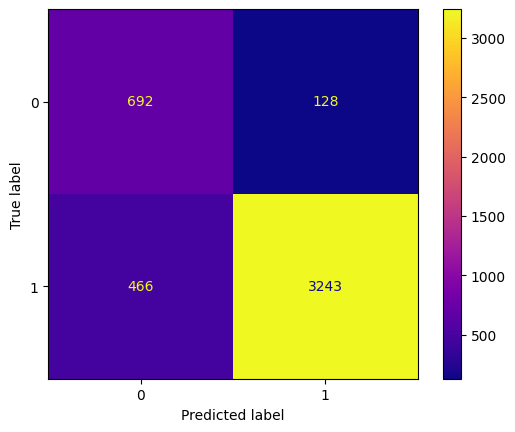

In [ ]:
print("LogReg_Count Model")
print ("-------------------")
eval(logreg_count,X_train_count,X_test_count)

In [ ]:
model = LogisticRegression()
model.fit(X_train_count,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_count)

In [ ]:
# Calculate and print metrics
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nAccuracy:",accuracy_score(y_test,y_pred))
print("\nPrecision:",precision_score(y_test,y_pred)) # for binary classification
print("\nRecall:",recall_score(y_test,y_pred)) # for binary classification
print("\nF1 Score:",f1_score(y_test,y_pred)) # for binary classification

Confusion Matrix:
 [[ 497  323]
 [ 185 3524]]

Accuracy: 0.8878339589313314

Precision: 0.9160384715362621

Recall: 0.9501213265031005

F1 Score: 0.9327686606670196


TF-IDF

In [ ]:
logreg_tfidf = LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state = 101)
logreg_tfidf.fit(X_train_tf_idf,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LogReg_TFIDF Model
-------------------
[[ 702  118]
 [ 467 3242]]
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.86      0.71       820
           1       0.96      0.87      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.87      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.64      0.92      0.75      3281
           1       0.98      0.88      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.90      0.84     18112
weighted avg       0.92      0.89      0.90     18112



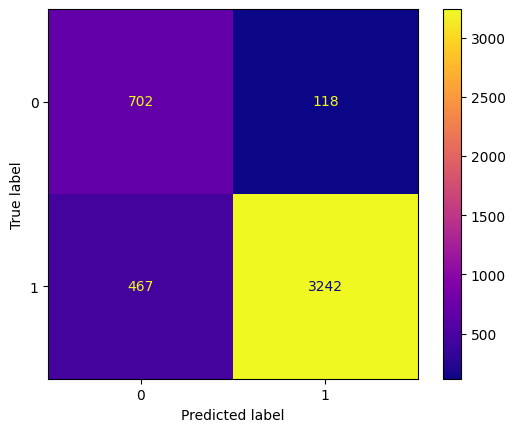

In [ ]:
print("LogReg_TFIDF Model")
print("-------------------")
eval(logreg_tfidf,X_train_tf_idf,X_test_tf_idf)

Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nbmulti_count = MultinomialNB()
nbmulti_count.fit(X_train_count,y_train)

MultinomialNB()

NBMulti_Count Model
-------------------
[[ 605  215]
 [ 303 3406]]
Test_Set
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.80      0.83      0.81      4529
weighted avg       0.89      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.70      0.82      0.75      3281
           1       0.96      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.85     18112
weighted avg       0.91      0.90      0.91     18112



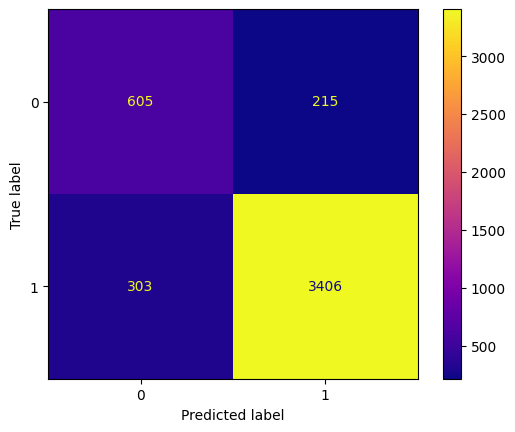

In [ ]:
print("NBMulti_Count Model")
print("-------------------")
eval(nbmulti_count,X_train_count,X_test_count)

TF-IDF MultinomialNB

In [ ]:
nbmulti_tfidf = MultinomialNB()
nbmulti_tfidf.fit(X_train_tf_idf,y_train)

MultinomialNB()

NBMulti_TF-IDF MODEL
-------------------
[[ 135  685]
 [  20 3689]]
Test_Set
              precision    recall  f1-score   support

           0       0.87      0.16      0.28       820
           1       0.84      0.99      0.91      3709

    accuracy                           0.84      4529
   macro avg       0.86      0.58      0.59      4529
weighted avg       0.85      0.84      0.80      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.23      0.37      3281
           1       0.85      1.00      0.92     14831

    accuracy                           0.86     18112
   macro avg       0.90      0.61      0.65     18112
weighted avg       0.87      0.86      0.82     18112



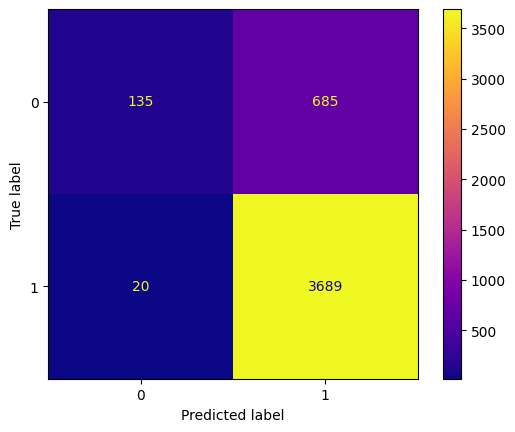

In [ ]:
print("NBMulti_TF-IDF MODEL")
print("-------------------")
eval(nbmulti_tfidf,X_train_tf_idf,X_test_tf_idf)

Support Vector Machine(SVM)Countvectorizer

In [ ]:
from sklearn.svm import LinearSVC
svc_count = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
svc_count.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVM_Count Model
-------------------
[[ 690  130]
 [ 464 3245]]
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.84      0.70       820
           1       0.96      0.87      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.86      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      3281
           1       0.98      0.89      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.89      0.90     18112



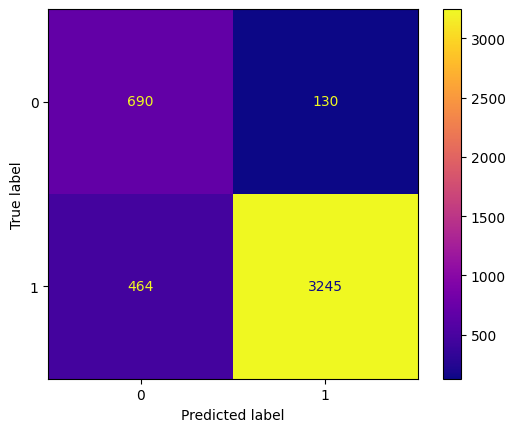

In [ ]:
print("SVM_Count Model")
print("-------------------")
eval(svc_count,X_train_count,X_test_count)

In [ ]:
svc_tf_idf = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
svc_tf_idf.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC_TFIDF Model
-------------------
[[ 711  109]
 [ 582 3127]]
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.87      0.67       820
           1       0.97      0.84      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.86      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.56      0.89      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



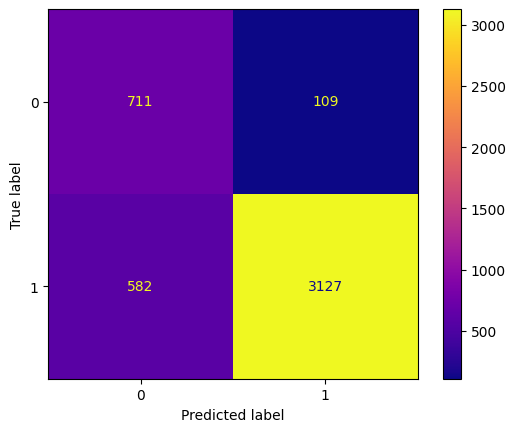

In [ ]:
print("SVC_TFIDF Model")
print("-------------------")
eval(svc_tf_idf,X_train_tf_idf,X_test_tf_idf)

Random Forest CountVectorizer

In [ ]:
# Import the necessary class
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_count = RandomForestClassifier(n_estimators = 200, max_depth = 11,class_weight = "balanced",random_state = 101, n_jobs = -1)
rf_count.fit(X_train_count,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=200,
                       n_jobs=-1, random_state=101)

RF_Count Model
-------------------
[[ 657  163]
 [ 570 3139]]
Test_Set
              precision    recall  f1-score   support

           0       0.54      0.80      0.64       820
           1       0.95      0.85      0.90      3709

    accuracy                           0.84      4529
   macro avg       0.74      0.82      0.77      4529
weighted avg       0.88      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.60      0.89      0.72      3281
           1       0.97      0.87      0.92     14831

    accuracy                           0.87     18112
   macro avg       0.79      0.88      0.82     18112
weighted avg       0.91      0.87      0.88     18112



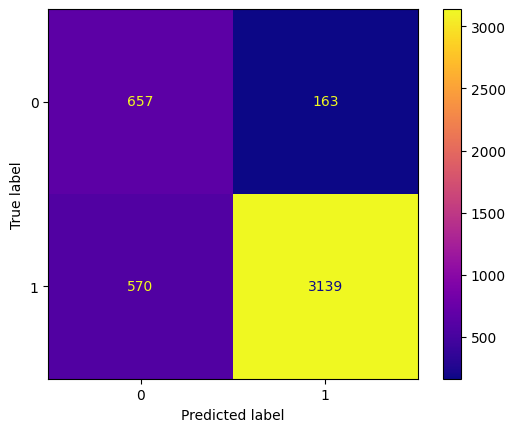

In [ ]:
print("RF_Count Model")
print("-------------------")
eval(rf_count,X_train_count,X_test_count)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_count = AdaBoostClassifier(n_estimators = 500,random_state = 101)
ada_count.fit(X_train_count,y_train)

AdaBoostClassifier(n_estimators=500, random_state=101)

In [ ]:
rf_tf_idf = RandomForestClassifier(n_estimators = 200, max_depth = 11,class_weight = "balanced",random_state = 101, n_jobs = -1)
rf_tf_idf.fit(X_train_tf_idf,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=200,
                       n_jobs=-1, random_state=101)

RF_TFIDF Model
-------------------
[[ 658  162]
 [ 599 3110]]
Test_Set
              precision    recall  f1-score   support

           0       0.52      0.80      0.63       820
           1       0.95      0.84      0.89      3709

    accuracy                           0.83      4529
   macro avg       0.74      0.82      0.76      4529
weighted avg       0.87      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.59      0.91      0.72      3281
           1       0.98      0.86      0.91     14831

    accuracy                           0.87     18112
   macro avg       0.78      0.89      0.82     18112
weighted avg       0.91      0.87      0.88     18112



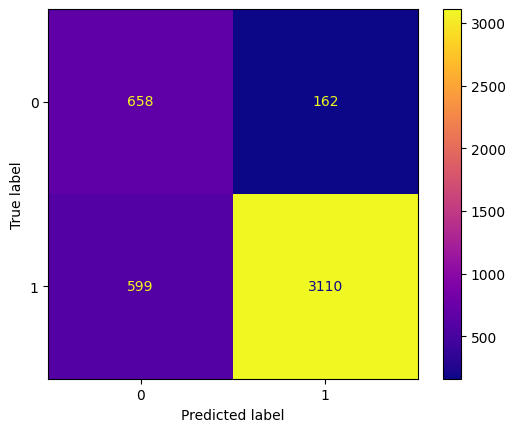

In [ ]:
print("RF_TFIDF Model")
print("-------------------")
eval(rf_tf_idf,X_train_tf_idf,X_test_tf_idf)

Ada Boosting CountVectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_count = AdaBoostClassifier(n_estimators = 500,random_state = 101)
ada_count.fit(X_train_count,y_train)

AdaBoostClassifier(n_estimators=500, random_state=101)

Ada_Count Model
-------------------
[[ 316  504]
 [  82 3627]]
Test_Set
              precision    recall  f1-score   support

           0       0.79      0.39      0.52       820
           1       0.88      0.98      0.93      3709

    accuracy                           0.87      4529
   macro avg       0.84      0.68      0.72      4529
weighted avg       0.86      0.87      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.76      0.37      0.50      3281
           1       0.88      0.97      0.92     14831

    accuracy                           0.86     18112
   macro avg       0.82      0.67      0.71     18112
weighted avg       0.85      0.86      0.85     18112



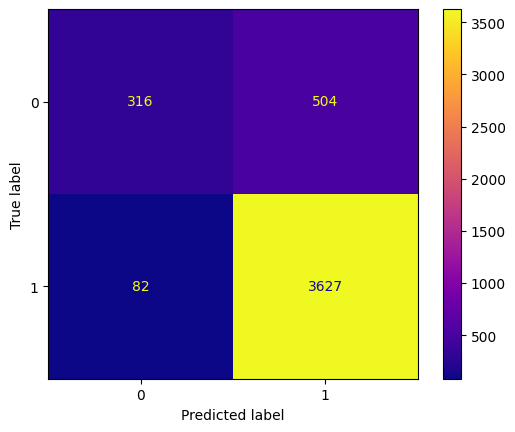

In [ ]:
print("Ada_Count Model")
print("-------------------")
eval(ada_count,X_train_count,X_test_count)

TF-IDF

In [ ]:
ada_tf_idf = AdaBoostClassifier(n_estimators = 500,random_state = 101)
ada_tf_idf.fit(X_train_tf_idf,y_train)

AdaBoostClassifier(n_estimators=500, random_state=101)

Ada_TFIDF Model
-------------------
[[ 285  535]
 [  81 3628]]
Test_Set
              precision    recall  f1-score   support

           0       0.78      0.35      0.48       820
           1       0.87      0.98      0.92      3709

    accuracy                           0.86      4529
   macro avg       0.83      0.66      0.70      4529
weighted avg       0.85      0.86      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.77      0.34      0.47      3281
           1       0.87      0.98      0.92     14831

    accuracy                           0.86     18112
   macro avg       0.82      0.66      0.70     18112
weighted avg       0.85      0.86      0.84     18112



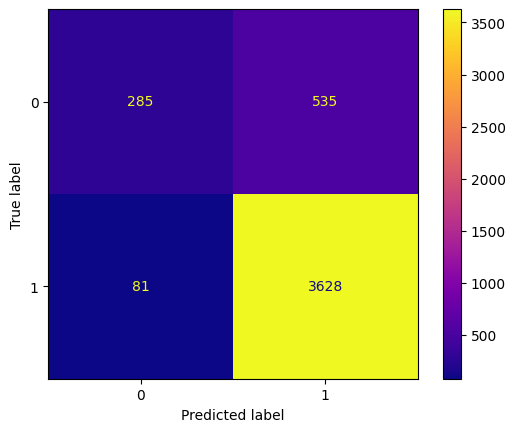

In [ ]:
# @title
print("Ada_TFIDF Model")
print("-------------------")
eval(ada_tf_idf,X_train_tf_idf,X_test_tf_idf)

In [ ]:
# 1. Prepare your data:

X = df_ml["text"] # Assuming "text" is the column containing preprocessed text
y = df_ml["recommended"] # Assuming "recommended " is your target variable

In [ ]:
# 2. Create TF-IDF vectors:

tfidf_vectorizer = TfidfVectorizer() # You can customize parameters here (e.g , max_features,ngram_range)
X_tfidf = tfidf_vectorizer.fit_transform(X) # Fit and transfrom on the entire dataset

In [ ]:
# 3. Initialize and train your final Logistic Regression model:

final_model = LogisticRegression(C=1,max_iter=1000,class_weight="balanced",random_state=101) # Use settings that you found to work well
final_model.fit(X_tfidf,y)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [ ]:
import joblib

In [ ]:
# save the model
joblib.dump(final_model,'final_model.pkl')

['final_model.pkl']

In [ ]:
# save the vectorizer
joblib.dump(tfidf_vectorizer,'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
# load and saved model and vectorizer
loaded_model = joblib.load('final_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

In [ ]:
# function to predict and print results
def predict_review(review_text):
  """Predicts the recommendation (0 or 1) for a given review"""
  processed_text = cleaning(review_text) # Assuming you have your cleaning function
  text_tfidf = loaded_vectorizer.transform([processed_text])
  prediction = loaded_model.predict(text_tfidf)[0]

  print(f"Review:{review_text}")
  print(f"Prediction: {'Recommended' if prediction == 1 else 'Not Recommended'}")

In [ ]:
# Example usage
review1 = "Dress is very loose."
review2 = "The material was cheap and it didn't fit well."
review3 = "the top is pretty."

In [ ]:
predict_review(review1)
predict_review(review2)
predict_review(review3)

Review:Dress is very loose.
Prediction: Not Recommended
Review:The material was cheap and it didn't fit well.
Prediction: Not Recommended
Review:the top is pretty.
Prediction: Recommended
